In [2]:
import pandas as pd
import sys 
sys.path.append('../code_general/')
%matplotlib inline
import matplotlib.pylab as plt 
import numpy as np 
import Nucleaseq_data_processing as processing
reload(processing)
import read_model_ID;
import calculate_cleavage_rate as clv
reload(read_model_ID);

In [32]:
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../data_nucleaseq_Finkelsteinlab/targetE/'
xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../Data_Boyle/',path_to_data)

## Weight calculating function

In [6]:
def weights(yerr):
    yerr_sqr = np.zeros(len(yerr))
    for i in range(len(yerr)):
        yerr_sqr[i] = yerr[i]**2
    Z = np.sum(np.reciprocal(yerr_sqr))
    weights = np.zeros(len(yerr))
    for i in range(len(yerr)):
        weights[i] = 1/yerr_sqr[i]/Z
    return weights

In [35]:
perfectClv = np.float(len(ydata[0][0]))
perfectOn = np.float(len(ydata[0][1]))
singleClv = 0.0
singleOn = 0.0
doubleClv = 0.0
doubleOn = 0.0
for i in range(len(xdata)):
    if len(xdata[i])==1:
        singleClv += len(ydata[i][0])
        singleOn += len(ydata[i][1])
    if len(xdata[i])==2:
        doubleClv += len(ydata[i][0])
        doubleOn += len(ydata[i][1])

chi_weights = [1/perfectClv,1/singleClv,1/doubleClv,1/perfectOn,1/singleOn,1/doubleOn]

## Best possible correlation

Text(0,0.5,'Measured on-rate (Hz)')

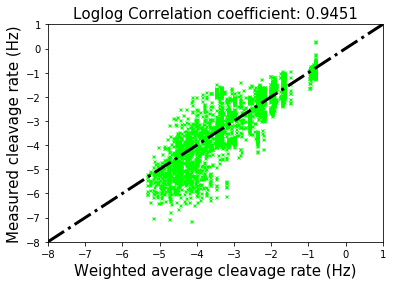

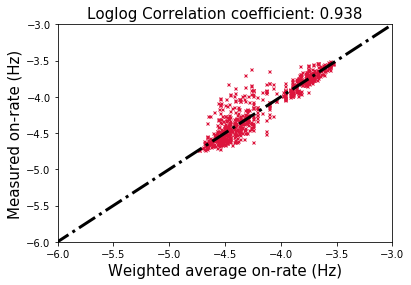

In [38]:
dataclv = []
averageclv = []
errorclv = []
dataon = []
averageon = []
erroron = []
chiweightclv = []
chiweighton = []
for i in range(len(xdata)):
    clv = np.average(ydata[i][0],weights=weights(yerr[i][0]))
    if len(yerr[i][1])!=0:
        on = np.average(ydata[i][1],weights=weights(yerr[i][1]))
        for j in range(len(ydata[i][1])):
            dataon.append(np.log10(ydata[i][1][j]))
            averageon.append(np.log10(on))
            erroron.append(yerr[i][1][j])
            if len(xdata[i])==2:
                chiweighton.append(chi_weights[5])
            elif len(xdata[i])==1:
                chiweighton.append(chi_weights[4])
            elif len(xdata[i])==0:
                chiweighton.append(chi_weights[3])
    for j in range(len(ydata[i][0])):
        if ydata[i][0][j]>-10:
            dataclv.append(ydata[i][0][j])
            averageclv.append(clv)
            errorclv.append(yerr[i][0][j])
            if len(xdata[i])==2:
                chiweightclv.append(chi_weights[2])
            elif len(xdata[i])==1:
                chiweightclv.append(chi_weights[1])
            elif len(xdata[i])==0:
                chiweightclv.append(chi_weights[0])
    
plt.figure()
plt.plot(averageclv,dataclv,marker='x',markersize=3,color='lime',linewidth=0.0)
plt.plot([-8,1],[-8,1],'k-.',linewidth=3)
plt.axis([-8,1,-8,1])
plt.title('Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([dataclv,averageclv])[0][1],4)), fontsize=15)
plt.xlabel('Weighted average cleavage rate (Hz)',fontsize=15)
plt.ylabel('Measured cleavage rate (Hz)',fontsize=15)

plt.figure()
plt.plot(averageon,dataon,marker='x',markersize=3,color='crimson',linewidth=0.0)
plt.plot([-7,0],[-7,0],'k-.',linewidth=3)
plt.axis([-6,-3,-6,-3])
plt.title('Loglog Correlation coefficient: ' + str(np.round(np.corrcoef([dataon,averageon])[0][1],4)), fontsize=15)
plt.xlabel('Weighted average on-rate (Hz)',fontsize=15)
plt.ylabel('Measured on-rate (Hz)',fontsize=15)


## Best possible chi squared (for sequence independent model)

In [40]:
chiclv = 0.
for i in range(len(dataclv)):
    chiclv += ((dataclv[i]-averageclv[i])**2/errorclv[i]**2)*chiweightclv[i]
print 'Best possible chi-squared for cleavage fit on full data: ' + str(np.round(chiclv))

chion = 0.
for i in range(len(dataon)):
    chion += ((10**dataon[i]-10**averageon[i])**2/erroron[i]**2)*chiweighton[i]
print 'Best possible chi-squared for binding fit on full data:  ' + str(np.round(chion))

print 'Best possible combined chi-squared on full data: ' + str(np.round(chiclv + chion))

Best possible chi-squared for cleavage fit on full data: 24.0
Best possible chi-squared for binding fit on full data:  181.0
Best possible combined chi-squared on full data: 206.0


## New and old weighted average

In [64]:
oldfit = '../fits_Stijn/17_4_2019/fit_17_4_2019_sim_6.txt'
newfit = '../fits_Stijn/24_4_2019b/fit_24_4_2019b_sim_3.txt'
model_ID = ['Clv_Saturated_general_energies_v2','general_energies_no_kPR']

dataold = pd.read_table(oldfit,index_col=False)
final_par_old = dataold.loc[len(dataold)-1,'Parameter 1':'Parameter 44']
final_par_old = final_par_old.values
chi_old = dataold.loc[:,'Potential']
chi_old = chi_old.iloc[-1]

datanew = pd.read_table(newfit,index_col=False)
final_par_new = datanew.loc[len(datanew)-1,'Parameter 1':'Parameter 44']
final_par_new = final_par_new.values
chi_new = datanew.loc[:,'Potential']
chi_new = chi_new.iloc[-1]

print 'Reported chi-squared of 17 fit: ' + str(chi_old)
print 'Reported chi-squared of 24 fit: ' + str(chi_new)

filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../data_nucleaseq_Finkelsteinlab/targetE/'
xdata, ydatafull, yerrfull = processing.prepare_multiprocessing_combined('1',filename,'../Data_Boyle/',path_to_data,False)
xdata, ydatanewwa, yerrnewwa = processing.prepare_multiprocessing_combined('1',filename,'../Data_Boyle/',path_to_data,True)

ydataoldwa = []
yerroldwa = []
for i in range(len(xdata)):
    if len(ydatafull[i][1])!=0:
        ydataoldwa.append([[np.average(ydatafull[i][0],weights=np.reciprocal(yerrfull[i][0]))],[np.average(ydatafull[i][1],weights=np.reciprocal(yerrfull[i][1]))]])
        yerroldwa.append([[np.sqrt(float(len(yerrfull[i][0]))/(np.sum(np.reciprocal(yerrfull[i][0])))**2)],[np.sqrt(float(len(yerrfull[i][1]))/(np.sum(np.reciprocal(yerrfull[i][1])))**2)]])
    else:
        ydataoldwa.append([[np.average(ydatafull[i][0],weights=np.reciprocal(yerrfull[i][0]))],[]])
        yerroldwa.append([[np.sqrt(float(len(yerrfull[i][0]))/(np.sum(np.reciprocal(yerrfull[i][0])))**2)],[]])

perfectClv = np.float(len(ydatanewwa[0][0]))
perfectOn = np.float(len(ydatanewwa[0][1]))
singleClv = 0.0
singleOn = 0.0
doubleClv = 0.0
doubleOn = 0.0
for i in range(len(xdata)):
    if len(xdata[i])==1:
        singleClv += len(ydatanewwa[i][0])
        singleOn += len(ydatanewwa[i][1])
    if len(xdata[i])==2:
        doubleClv += len(ydatanewwa[i][0])
        doubleOn += len(ydatanewwa[i][1])

chi_weights = [1/perfectClv,1/singleClv,1/doubleClv,1/perfectOn,1/singleOn,1/doubleOn]

chi_old2 = 0.
for i in range(len(xdata)):
    chi_old2 = chi_old2 + clv.calc_chi_squared(final_par_old,xdata[i],ydataoldwa[i],yerroldwa[i],chi_weights,20,model_ID)
print 'Recalculated chi-squared of 17 fit: ' + str(chi_old2)

chi_new2 = 0.
for i in range(len(xdata)):
    chi_new2 = chi_new2 + clv.calc_chi_squared(final_par_new,xdata[i],ydatanewwa[i],yerrnewwa[i],chi_weights,20,model_ID)
print 'Recalculated chi-squared of 24 fit: ' + str(chi_new2)
print ''

chi_oldnew = 0.
for i in range(len(xdata)):
    chi_oldnew = chi_oldnew + clv.calc_chi_squared(final_par_old,xdata[i],ydatanewwa[i],yerrnewwa[i],chi_weights,20,model_ID)
print 'Chi-squared  17 fit on 24 wa: ' + str(chi_oldnew)

chi_newold = 0.
for i in range(len(xdata)):
    chi_newold = chi_newold + clv.calc_chi_squared(final_par_new,xdata[i],ydataoldwa[i],yerroldwa[i],chi_weights,20,model_ID)
print 'Chi-squared  24 fit on 17 wa: ' + str(chi_newold)

print ''
print oldfit + ' performs better on both weighted averages'

Reported chi-squared of 17 fit: 585.800629716
Reported chi-squared of 24 fit: 1223.59554018
Recalculated chi-squared of 17 fit: 585.8000364178561
Recalculated chi-squared of 24 fit: 1223.6001356213017

Chi-squared  17 fit on 24 wa: 775.059466600527
Chi-squared  24 fit on 17 wa: 1245.5569881006006

../fits_Stijn/17_4_2019/fit_17_4_2019_sim_6.txt performs better on both weighted averages


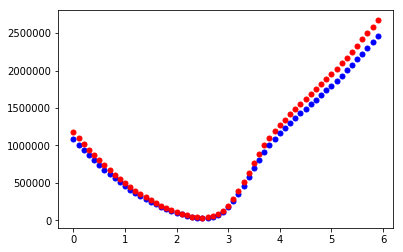

In [46]:
plt.figure()
chi_trace_old = []
chi_trace_new = []
for j in np.arange(0,6,0.1):
    final_par_old[-2] = j

    chi_old2 = 0.
    for i in range(len(xdata)):
        chi_old2 = chi_old2 + clv.calc_chi_squared(final_par_old,xdata[i],ydataoldwa[i],yerroldwa[i],chi_weights,20,model_ID)

    chi_oldnew = 0.
    for i in range(len(xdata)):
        chi_oldnew = chi_oldnew + clv.calc_chi_squared(final_par_old,xdata[i],ydatanewwa[i],yerrnewwa[i],chi_weights,20,model_ID)
    
    chi_trace_old.append(chi_old2)
    chi_trace_new.append(chi_oldnew)
    
    plt.plot(j,chi_old2,'b',marker='o',markersize=5)
    plt.plot(j,chi_oldnew,'r',marker='o',markersize=5)

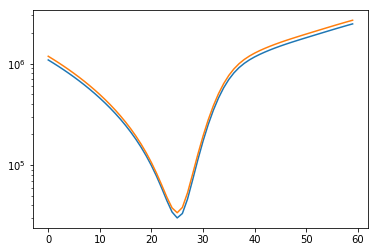

In [47]:
plt.figure
plt.semilogy(range(len(chi_trace_old)),chi_trace_old)
plt.semilogy(range(len(chi_trace_new)),chi_trace_new)

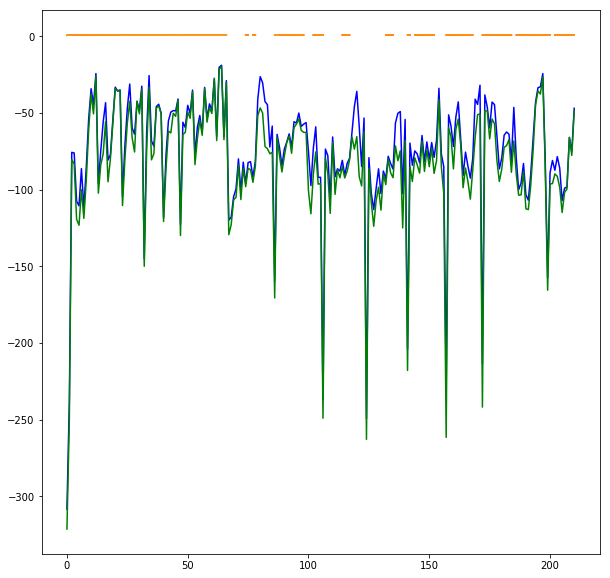

In [68]:
oldclv = []
oldon = []
newclv = []
newon = []

for i in range(len(xdata)):
    oldclv.append(ydataoldwa[i][0][0]/yerroldwa[i][0][0])
    newclv.append(ydatanewwa[i][0][0]/yerrnewwa[i][0][0])
    if len(ydataoldwa[i][1])>0:
        oldon.append(np.log10(ydataoldwa[i][1][0])/np.log10(yerroldwa[i][1][0]))
        newon.append(np.log10(ydatanewwa[i][1][0])/np.log10(yerrnewwa[i][1][0]))
    else:
        oldon.append(np.nan)
        newon.append(np.nan)
        
plt.figure(figsize=[10,10])
plt.plot(oldclv,'b')
plt.plot(oldon,'r')
plt.plot(newclv,'g')
plt.plot(newon,'orange')

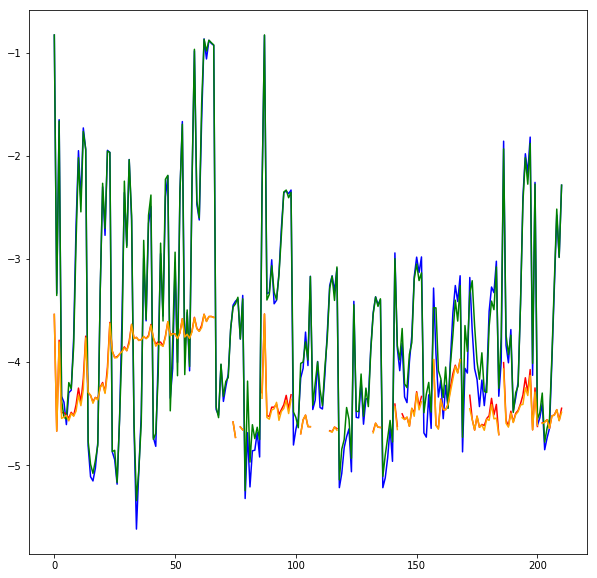

In [67]:
oldclv = []
oldon = []
newclv = []
newon = []

for i in range(len(xdata)):
    oldclv.append(ydataoldwa[i][0][0])
    newclv.append(ydatanewwa[i][0][0])
    if len(ydataoldwa[i][1])>0:
        oldon.append(np.log10(ydataoldwa[i][1][0]))
        newon.append(np.log10(ydatanewwa[i][1][0]))
    else:
        oldon.append(np.nan)
        newon.append(np.nan)
        
plt.figure(figsize=[10,10])
plt.plot(oldclv,'b')
plt.plot(oldon,'r')
plt.plot(newclv,'g')
plt.plot(newon,'orange')